In [464]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

In [465]:
fish_data = pd.read_csv('dataset.csv')

# Linear Regression
___
### Simple Regression
$$ y = wx + b $$
### Multivariable Regression
$$ y = b + w_1x_1 + w_2x_2 + ... + w_nx_n$$
## Cost Function (Mean Squared Error)
$$ MSE = \frac{1}{N} \sum{(y - \hat{y})^2} $$
## Gradient Descent

In [466]:
y = fish_data['Weight'].values
y = y[:, np.newaxis]
X = fish_data.iloc[:, 2:7].values
X = np.append(np.ones([X.shape[0],1]), X, axis=1)

In [467]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

## Simple Linear Regression


-0.3715195135529099


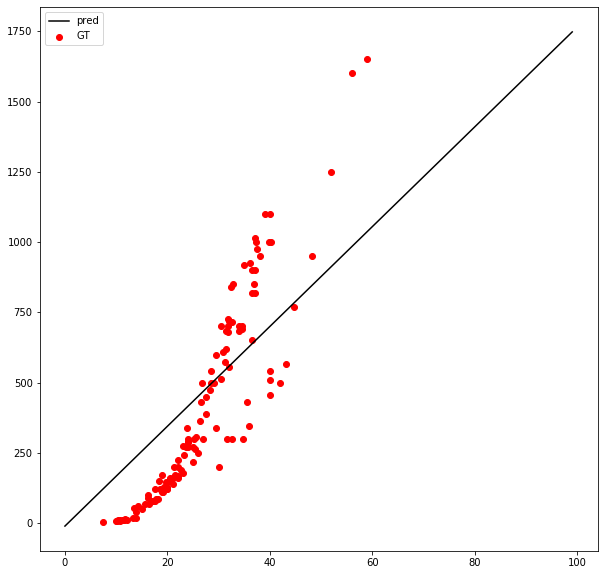

In [468]:
def simple_lr(x, y, num_iters):
    n = x.shape[0]
    alpha = 0.0001
    
    b = 0
    w = 0
    
    for i in range(num_iters):
        y_hat = b + w*x
        error = y_hat - y
        mean_sq_er = np.sum(error**2) / n
        db = 2 * np.sum(error) / n
        b = b - alpha*db
        dw = 2 * np.sum(error * x) / n
        w = w - alpha*dw
        
    return [w, b]

simple_x_train = X_train[:, 1]
simple_x_train = simple_x_train[:, np.newaxis]
simple_y_train = y_train

w, b = simple_lr(simple_x_train, simple_y_train, 1000)
print(r2_score((w*simple_x_train + b), simple_y_train))

y_plot = []
for i in range(100):
    y_plot.append(b + w * i)
plt.figure(figsize=(10,10))
plt.scatter(simple_x_train,simple_y_train,color='red',label='GT')
plt.plot(range(len(y_plot)),y_plot,color='black',label = 'pred')
plt.legend()
plt.show()

## Multivariable Regression

(7, 1)


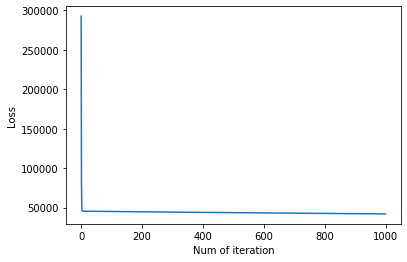

In [469]:
def multivar_lr(X, y, num_iters):
    alpha = 0.0001
    n = y.shape[0]
    
    X = np.append(np.ones([X.shape[0],1]), X, axis=1)
    W = np.zeros((X.shape[1], 1))
    
    mean_sq_er_history = []
    
    for i in range(num_iters):
        y_hat = np.dot(X, W)
        error = y_hat - y
        mean_sq_er = np.sum(error**2) / n
        mean_sq_er_history.append(mean_sq_er)
        dW = 2 * np.dot(X.T, error) / n
        W = W - alpha*dW
        
    return [W, mean_sq_er_history]

W, history = multivar_lr(X_train, y_train, 1000)
print(W.shape)
plt.plot(range(1000), history)
plt.xlabel('Num of iteration')
plt.ylabel('Loss')
plt.show()

## Sklearn

In [470]:
reg = LinearRegression()
reg.fit(X_train, y_train)

y_head = reg.predict(X_train)
r2_score(y_train, y_head)

0.8861940780217027